In [8]:
######### Amazon Reviews Extraction ##############################
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
# creating empty reviews list 
amazon_reviews=[]

In [10]:
for i in range(1,10):
  ip=[]  
  url="https://www.amazon.in/iQOO-Storage-Snapdragon-Processor-44WFlashCharge/product-reviews/B07WHS7MZ4/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=" +str(i)  
  response = requests.get(url)
  # creating soup object to iterate over the extracted content 
  soup = bs(response.content,"html.parser")
  # Extracting the content under specific tags  
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
  # adding the reviews of one page to empty list which in future contains all the reviews
  amazon_reviews=amazon_reviews+ip

In [11]:
amazon_reviews

["\n1.Battery: Actual charging time is around 1.5 percentage per minute. With the charger which is included in this box. Charging is fast.2. It's Android 13 but after update it's Android 14 which is a good thing which is not mentioned  anywhere.3. Front and rear Camera is also good.4. Light weight.5. There is no any temper or Gorilla glass fixed by the company on display. There is just plastic guard on the display like other mobiles.6. If addition tempered/gorrila glass fixed by the  shop then air bubbles will be occured and you have to removed it. This is because of Original silicon mobile cover provided by the company which is inside the box.7. Over all performace is very good.\n",
 '\n"This the review after roughly 3 months"My mobile - 6GB |128GBFirst of all it is small size as iPhone-13 if you used Redmi like mobiles  (it is kinda cute and easy to hold). It is very light weighted (very light weight)It is very Nice budget friendly mobile...I installed more than 50+ working apps and 

In [12]:
# writng reviews in a text file 
with open("shivansh.txt","w",encoding='utf8') as output:
    output.write(str(amazon_reviews))

In [13]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(amazon_reviews)
ip_rev_string

'\n1.Battery: Actual charging time is around 1.5 percentage per minute. With the charger which is included in this box. Charging is fast.2. It\'s Android 13 but after update it\'s Android 14 which is a good thing which is not mentioned  anywhere.3. Front and rear Camera is also good.4. Light weight.5. There is no any temper or Gorilla glass fixed by the company on display. There is just plastic guard on the display like other mobiles.6. If addition tempered/gorrila glass fixed by the  shop then air bubbles will be occured and you have to removed it. This is because of Original silicon mobile cover provided by the company which is inside the box.7. Over all performace is very good.\n \n"This the review after roughly 3 months"My mobile - 6GB |128GBFirst of all it is small size as iPhone-13 if you used Redmi like mobiles  (it is kinda cute and easy to hold). It is very light weighted (very light weight)It is very Nice budget friendly mobile...I installed more than 50+ working apps and I d

In [14]:
import nltk

In [15]:
# Removing unwanted symbols and numbers incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [16]:
# check words in the review by using len
ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['',
 'battery',
 'actual',
 'charging',
 'time',
 'is',
 'around',
 'percentage',
 'per',
 'minute',
 'with',
 'the',
 'charger',
 'which',
 'is',
 'included',
 'in',
 'this',
 'box',
 'charging',
 'is',
 'fast',
 'it',
 's',
 'android',
 'but',
 'after',
 'update',
 'it',
 's',
 'android',
 'which',
 'is',
 'a',
 'good',
 'thing',
 'which',
 'is',
 'not',
 'mentioned',
 'anywhere',
 'front',
 'and',
 'rear',
 'camera',
 'is',
 'also',
 'good',
 'light',
 'weight',
 'there',
 'is',
 'no',
 'any',
 'temper',
 'or',
 'gorilla',
 'glass',
 'fixed',
 'by',
 'the',
 'company',
 'on',
 'display',
 'there',
 'is',
 'just',
 'plastic',
 'guard',
 'on',
 'the',
 'display',
 'like',
 'other',
 'mobiles',
 'if',
 'addition',
 'tempered',
 'gorrila',
 'glass',
 'fixed',
 'by',
 'the',
 'shop',
 'then',
 'air',
 'bubbles',
 'will',
 'be',
 'occured',
 'and',
 'you',
 'have',
 'to',
 'removed',
 'it',
 'this',
 'is',
 'because',
 'of',
 'original',
 'silicon',
 'mobile',
 'cover',
 'provided',
 'by

In [137]:
# to check the total number of review words
len(ip_reviews_words)

1254

In [18]:
with open("stop.txt","r") as sw:
    stop_words = sw.read()

# Split the imported stopwords into single lines    
stop_words = stop_words.split("\n")

In [19]:
# extend the stop words with a few common words related to a water kettle
stop_words.extend(["phone","product","good","day","price"])

In [20]:
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [21]:
# Remove all the stop words from the review
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

In [22]:
ip_reviews_words

['',
 'battery',
 'actual',
 'charging',
 'time',
 'percentage',
 'minute',
 'charger',
 'included',
 'box',
 'charging',
 'fast',
 'android',
 'update',
 'android',
 'thing',
 'mentioned',
 'front',
 'rear',
 'camera',
 'light',
 'weight',
 'temper',
 'gorilla',
 'glass',
 'fixed',
 'company',
 'display',
 'plastic',
 'guard',
 'display',
 'mobiles',
 'addition',
 'tempered',
 'gorrila',
 'glass',
 'fixed',
 'shop',
 'air',
 'bubbles',
 'occured',
 'removed',
 'original',
 'silicon',
 'mobile',
 'cover',
 'provided',
 'company',
 'inside',
 'box',
 'performace',
 'review',
 'roughly',
 'months',
 'mobile',
 'gb',
 'gbfirst',
 'small',
 'size',
 'redmi',
 'mobiles',
 'kinda',
 'cute',
 'easy',
 'hold',
 'light',
 'weighted',
 'light',
 'weight',
 'nice',
 'budget',
 'friendly',
 'mobile',
 'installed',
 'working',
 'apps',
 'didn',
 'encountered',
 'issue',
 'performanceeven',
 'mobile',
 'gaming',
 'coz',
 'cons',
 'battery',
 'draining',
 'mah',
 'gaming',
 'smooth',
 'nice',
 'camer

In [23]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [24]:
ip_rev_string

' battery actual charging time percentage minute charger included box charging fast android update android thing mentioned front rear camera light weight temper gorilla glass fixed company display plastic guard display mobiles addition tempered gorrila glass fixed shop air bubbles occured removed original silicon mobile cover provided company inside box performace review roughly months mobile gb gbfirst small size redmi mobiles kinda cute easy hold light weighted light weight nice budget friendly mobile installed working apps didn encountered issue performanceeven mobile gaming coz cons battery draining mah gaming smooth nice camera quality decent quality mp camera mp stabilization camera photo video refresh rate hz super high performaning usage problem heating ui updated ui display finger print sensor area oled display fps fps display smooth enlights colourfull images focused disadvantage things mentionedother mobile budget high battery capacity camera clearity focus touch screen mobi

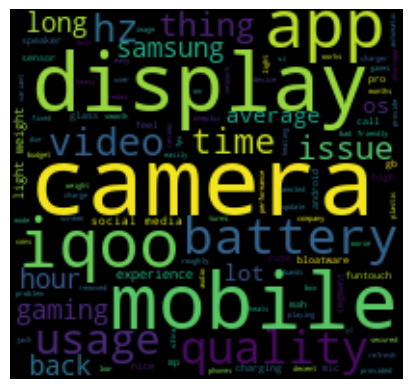

In [25]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the phone silhouette image
phone_mask = np.array(Image.open(r"C:\Users\shiva\OneDrive\Desktop\Fw_ amazon code (1)\images (1).png"))

# Generate the word cloud with the phone mask and outline
wordcloud_ip = WordCloud(
    background_color='black',  # Change the background color to black
    mask=phone_mask,  # Set the mask to the phone silhouette image
    contour_color='white',  # Set the contour color to white
    contour_width=1,  # Set the contour width to 1
    width=2000,
    height=1400,
).generate(ip_rev_string)

# Display the word cloud
plt.imshow(wordcloud_ip, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()


In [26]:
# positive words 
# Choose the path for +ve words stored in system
# Using this find the positive words in the review and plot a word cloud

with open("old-positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [27]:
poswords

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [28]:
# Positive word cloud
# Choosing from the review only the words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

In [34]:
len(ip_pos_in_pos)

292

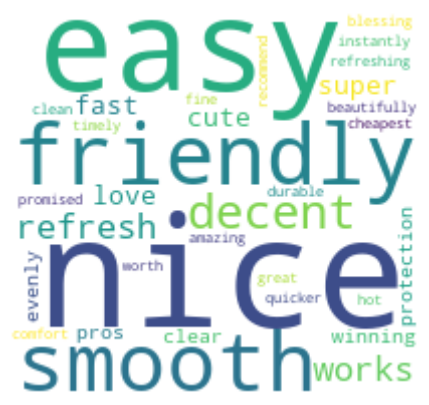

In [29]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the phone silhouette image
phone_mask = np.array(Image.open(r"C:\Users\shiva\OneDrive\Desktop\Fw_ amazon code (1)\images (1).png"))

# Generate the word cloud
wordcloud_pos_in_pos = WordCloud(
    background_color='white',
    mask=phone_mask,  # Set the mask to the provided image
    contour_color='steelblue',  # Add a contour color
    contour_width=1,  # Set contour width
    width=1800,
    height=1400
).generate(ip_pos_in_pos)

# Display the word cloud
plt.figure(figsize=(6, 5))
plt.imshow(wordcloud_pos_in_pos, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


In [31]:
# negative words 
# Choose path for -ve words stored in system
# # Using this find the negative words in the review and plot a word cloud
with open("old-negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

In [32]:
negwords

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


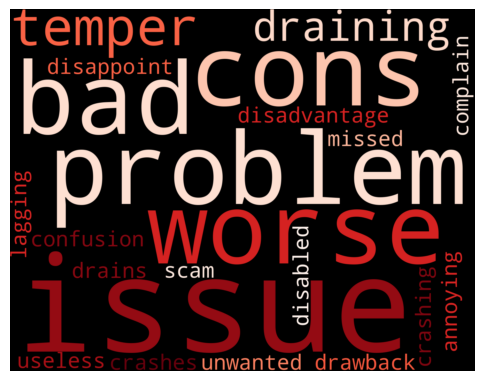

In [33]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Additional preprocessing (if needed)
ip_neg_in_neg_cleaned = " ".join([w for w in ip_reviews_words if w in negwords])
# Consider adding more preprocessing steps like stemming or lemmatization if necessary

# Generate the word cloud
wordcloud_neg_in_neg = WordCloud(
    background_color='black',
    width=1800,
    height=1400,
    contour_color='red',  # Add a contour color
    contour_width=2,  # Set contour width
    max_words=100,  # Limit the number of words
    colormap='Reds'  # Use a red colormap
).generate(ip_neg_in_neg_cleaned)

# Display the word cloud
plt.figure(figsize=(6, 5))
plt.imshow(wordcloud_neg_in_neg, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


In [35]:
len(ip_neg_in_neg_cleaned)

218

In [153]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert text to lowercase
    text = " ".join([word for word in word_tokenize(text) if word.isalnum() and word not in stop_words])
    return text

# Example usage
cleaned_reviews = [preprocess_text(review) for review in amazon_reviews]


In [155]:
cleaned_reviews

['actual charging time around percentage per minute charger included box charging android 13 update android 14 good thing mentioned front rear camera also light temper gorilla glass fixed company display plastic guard display like addition glass fixed shop air bubbles occured removed original silicon mobile cover provided company inside performace good',
 'review roughly 3 months mobile 6gb small size used redmi like mobiles kinda cute easy hold light weighted light weight nice budget friendly mobile installed working apps encountered issue performanceeven though mobile gaming coz cons battery draining 4500mah gaming smooth quality decent though much quality said 64mp camera looks like 48mp stabilization good camera photo video refresh rate 90hz super good high performaning usage little problem heating ui updated old ui good finger print sensor good 5g better many area oled display 1080p 60fps 2k 60fps display smooth enlights colourfull focused disadvantage things one mentionedother ov

In [156]:
import numpy as np

# Print TF-IDF matrix in a readable format
print("TF-IDF Matrix:")
tfidf_array = tfidf_matrix.toarray()
num_features = len(feature_names)
num_reviews = len(cleaned_reviews)

# Print only first 5 rows for better readability
for i in range(min(5, num_reviews)):
    print("Review {}:".format(i + 1))
    for j in range(num_features):
        print("{:20}: {:.4f}".format(feature_names[j], tfidf_array[i][j]))
    print()

# Print the remaining reviews' TF-IDF scores
if num_reviews > 5:
    print("... (Only showing TF-IDF scores for first 5 reviews)")

# Print feature names in a readable format
print("\nFeature Names:")
feature_names_str = ", ".join(feature_names)
print(feature_names_str[:200] + ("..." if len(feature_names_str) > 200 else ""))


TF-IDF Matrix:
Review 1:
1080p               : 0.0000
128gb               : 0.0000
13                  : 0.1384
14                  : 0.1384
15k                 : 0.0000
1ft                 : 0.0000
20k                 : 0.0000
2k                  : 0.0000
30hz                : 0.0000
30k                 : 0.0000
44w                 : 0.0000
4500mah             : 0.0000
48mp                : 0.0000
4g                  : 0.0000
50                  : 0.0000
5g                  : 0.0000
60fps               : 0.0000
60hz                : 0.0000
64mp                : 0.0000
695                 : 0.0000
6gb                 : 0.0000
90                  : 0.0000
90hz                : 0.0000
920                 : 0.0000
able                : 0.0000
actual              : 0.1384
addition            : 0.1384
air                 : 0.1384
airtel              : 0.0000
already             : 0.0000
also                : 0.1176
although            : 0.0000
always              : 0.0000
amazing           

In [160]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review and print the sentiment score
for i, review in enumerate(amazon_reviews):
    sentiment = analyzer.polarity_scores(review)
    print("Review {}: {}".format(i + 1, sentiment))


Review 1: {'neg': 0.021, 'neu': 0.848, 'pos': 0.131, 'compound': 0.9386}
Review 2: {'neg': 0.052, 'neu': 0.758, 'pos': 0.19, 'compound': 0.9873}
Review 3: {'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compound': 0.4767}
Review 4: {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.4939}
Review 5: {'neg': 0.043, 'neu': 0.819, 'pos': 0.139, 'compound': 0.9936}
Review 6: {'neg': 0.089, 'neu': 0.87, 'pos': 0.041, 'compound': -0.631}
Review 7: {'neg': 0.036, 'neu': 0.794, 'pos': 0.17, 'compound': 0.9918}
Review 8: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
Review 9: {'neg': 0.108, 'neu': 0.864, 'pos': 0.028, 'compound': -0.7604}
Review 10: {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.7269}


In [110]:
from sklearn.cluster import KMeans

def cluster_reviews(tfidf_matrix, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    return kmeans.labels_

# Example usage
num_clusters = 5
cluster_labels = cluster_reviews(tfidf_matrix, num_clusters)


C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
def print_cluster_info(tfidf_matrix, cluster_labels, feature_names, amazon_reviews, num_clusters):
    print("Top words for each cluster:")
    order_centroids = tfidf_matrix.toarray().argsort(axis=1)[:, ::-1]
    for i in range(num_clusters):
        print("Cluster %d:" % i)
        top_words = [feature_names[ind] for ind in order_centroids[i, :10]]
        print(", ".join(top_words))
        print()

    print("Reviews in each cluster:")
    for cluster_num in range(num_clusters):
        print("\nCluster {}:".format(cluster_num))
        cluster_reviews = [amazon_reviews[i] for i, cluster in enumerate(cluster_labels) if cluster == cluster_num]
        for review in cluster_reviews[:3]:  # Print only the first 3 reviews for each cluster
            print("-", review)

# Example usage
print_cluster_info(tfidf_matrix, cluster_labels, feature_names, amazon_reviews, num_clusters)


Top words for each cluster:
Cluster 0:
fixed, company, glass, charging, android, display, good, performace, percentage, update

Cluster 1:
mobile, good, 60fps, smooth, ui, budget, though, gaming, like, quality

Cluster 2:
clearity, capacity, focus, best, looking, screen, low, high, weight, battery

Cluster 3:
purpose, otherwise, match, 20k, want, 30k, specifications, phones, phone, good

Cluster 4:
iqoo, z7s, os, funtouch, back, samsung, battery, using, usage, good

Reviews in each cluster:

Cluster 0:
- 
"This the review after roughly 3 months"My mobile - 6GB |128GBFirst of all it is small size as iPhone-13 if you used Redmi like mobiles  (it is kinda cute and easy to hold). It is very light weighted (very light weight)It is very Nice budget friendly mobile...I installed more than 50+ working apps and I didn't encountered any issue in the performanceEven though "This mobile is not for Gaming" coz there is cons that there is battery draining as it is only 4500mah. But Gaming is so smoo

In [168]:
def text_summarization(review_list, num_sentences=3):
    # Concatenate all reviews into a single text
    concatenated_text = ' '.join(review_list)
    
    # Preprocess the concatenated text
    preprocessed_sentences = preprocess_text(concatenated_text)
    
    # Compute similarity matrix
    similarity_matrix = compute_similarity_matrix(preprocessed_sentences)
    
    # Initialize scores
    scores = np.zeros(len(preprocessed_sentences))
    
    # Iterate to calculate scores using PageRank algorithm
    for _ in range(10):
        scores = 0.15 + 0.85 * similarity_matrix.dot(scores)
    
    # Get indices of top-ranked sentences
    top_indices = scores.argsort()[-num_sentences:][::-1]
    top_indices.sort()
    
    # Generate summary using top-ranked sentences
    summary = ' '.join([preprocessed_sentences[i] for i in top_indices])
    
    return summary

# Generate summary for the entire list of Amazon reviews
amazon_reviews_summary = text_summarization(amazon_reviews)
print(amazon_reviews_summary)


though plastic iqoo given good glossy finish especially beautifully back camera pictures taken back camera depth sensor good selfie camera quality average would comfort good phone good looking
